In [1]:
########## This is some SAGEmath code used during the preparation of the paper
########## “A brute force computer aided proof of an existence result about extremal hyperbolic surfaces”
########## by Ernesto Girondo and Cristian Reyes

########## THE CASE N=10

In [2]:
########## CELL 1: SOME FUNCTIONS

########## FUNCTION poli2pi3. Edges, vertices and midpoints of a regular polygon of n edges
def poli2pi3(n):
    u'''This is a function of an integer n. The output is a triplet consisting of the n edges, the n vertices 
    and the n edge midpoints of a regular hyperbolic polygon of angle 2Pi/3 centered at the origin. Points and vertices 
    are listed in counterclockwise order. The first midpoint, which lies in the negative imaginary axis, 
    corresponds to the last edge. 
    '''
    H=N(arccosh(1/(tan((pi)/n)*tan((pi)/3))))
    h=N(tanh(H/2))
    R=N(arccosh((cos((pi)/3))/(sin((pi/n)))))
    r=N(tanh(R/2))
    puntosmedios=[N(r*(cos(3*(pi)/2+2*k*pi/n))+I*r*(sin(3*(pi)/2+2*k*pi/n))) for k in [0..n-1]]
    vertices=[N(h*(cos(3*(pi)/2+(1+2*k)*pi/n))+h*(sin(3*(pi)/2+(1+2*k)*pi/n))*I) for k in [0..n]]
    lados = [PD.get_geodesic(vertices[k], vertices[k+1]) for k in [0..n-1]]
    return lados, vertices, puntosmedios
#####



##### FUNCTION   moverpol returns a plot of the image of the list of edges "lados", which is a global variable
def moverpol(x, col):
    u'''This is a function of a transformation x and a color col. The output is a plot in color col of the image of the 
    set "lados", which is a global variable.
    '''
    global lados
    bpol=Graphics()
    for j in [0..M-1]:
        movido=x*lados[j]
        bpol+=movido.show(color=col)
    return bpol
#####

In [3]:
########## CELL2: SOME CODE DEFINING THE GENERATORS OF A TRIANGLE GROUP (2,3,M) and related things


PD=HyperbolicPlane().PD() #The Disc model of the hyperbolic plane

M=10  #The number of edges of the polygons. This is called N in the paper

lados, vertices, puntosmedios = poli2pi3(M) #

#Now computing the points A,B,C and the three generators a,b,c of the extended triangle group (2,3,M)
H=N(arccosh(1/(tan((pi)/M)*tan((pi)/3))))
h=N(tanh(H/2))
R=N(arccosh((cos((pi)/3))/(sin((pi)/M))))
r=N(tanh(R/2))
LM=N(arccosh((cos((pi)/M))/(sin((pi)/3))))
L=2*LM
l=N(tanh(L/2))

B=PD.get_point(0+0*I)
C=PD.get_point(N(r*cos((pi)*3/2)+r*sin((pi)*3/2)*I))
A=PD.get_point(N(h*cos((pi)/M+3*(pi)/2)+h*sin((pi)/M+3*(pi)/2)*I))
lado_c, lado_b, lado_a =PD.get_geodesic(A,B),PD.get_geodesic(A,C), PD.get_geodesic(B,C)
a,b,c=lado_a.reflection_involution(), lado_b.reflection_involution(), lado_c.reflection_involution()

In [4]:
########## CELL3: OTHER USEFUL FUNCTIONS

def Rota(t):
    return (c*a)^t*a*b

def rotasionpi(p,q): #THE ORDER 2 ELLIPTIC ELEMENT PERMUTING TWO GIVEN POINTS p AND q
    ek1=PD.get_point(p)
    ek2=PD.get_point(q)
    geod=PD.get_geodesic(ek1,ek2)
    ek3=geod.midpoint().coordinates()
    ma1=matrix([[I,(ek3)*(-I)],[(ek3.conjugate())*(I),-I]])
    Rot=PD.get_isometry(ma1)
    rotpii=matrix([[I,0],[0,-I]])
    rotpi=PD.get_isometry(rotpii)
    fuu=Rot*rotpi*Rot^-1
    return fuu

def G0(i):
    return a*b*(c*a)^i*a*b
def G1(i):
    return (c*a)*a*b*(c*a)^i*a*b*(c*a)^-1
def G2(i):
    return (c*a)^2*a*b*(c*a)^i*a*b*(c*a)^-2
def G3(i):
    return (c*a)^3*a*b*(c*a)^i*a*b*(c*a)^-3
def G4(i):
    return (c*a)^4*a*b*(c*a)^i*a*b*(c*a)^-4
def G5(i):
    return (c*a)^5*a*b*(c*a)^i*a*b*(c*a)^-5

/Applications/SageMath-8.2.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:31: DeprecationWarning: show is deprecated. Please use plot instead.
See http://trac.sagemath.org/20530 for details.


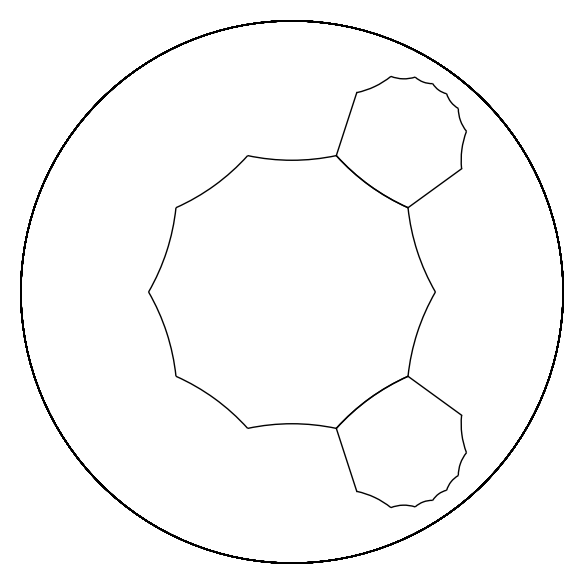

In [5]:
########## CELL4: plotdom IS THE FUNDAMENTAL DOMAIN F DESCRIBED IN THE TEXT AND sidepairings ARE THE SET
########## OF SIDE PAIRING TRANSFORMATIONS GENERATING THE GROUP K

plotdom=moverpol(a*a^-1,'black')+moverpol((c*a)*a*b,'black')+moverpol((c*a)^4*a*b,'black')
   
show(plotdom)

sidepairings=['comodin']
sidepairingscode=['cero']

sidepairings.append((c*a)^2*b)                                    #1 Side pairing (-, 1_0, 1_2)
sidepairingscode.append('(-, 1_0, 1_2)')
sidepairings.append((c*b)^2*c*a*c*a*c)                            #2 Side pairing (-, 1_3, 3_1)
sidepairingscode.append('(-, 1_3, 3_1)')
sidepairings.append(c*b*(c*a)^6*a*b*(a*c)^5)                      #3 Side pairing (+, 1_5, 3_6)
sidepairingscode.append('(+, 1_5, 3_6)')
sidepairings.append((c*a)^4*a*b*(c*a)^6*a*b*(a*c)^6)              #4 Side pairing (+, 1_6, 6_6)
sidepairingscode.append('(+, 1_6, 6_6)')
sidepairings.append(c*b*(c*a)^3*a*b*(a*c)^7)                      #5 Side pairing (+, 1_7, 3_3)
sidepairingscode.append('(+, 1_7, 3_3)')
sidepairings.append((c*a)^2*((c*a)^2*a*b)^2*(c*a)^7*c)            #6 Side pairing (-, 1_8, 6_2) 
sidepairingscode.append('(-, 1_8, 6_2)')
sidepairings.append(c*b*(c*a)^9*a*b*(c*a)^8*c)                    #7 Side pairing (-, 1_9, 3_9) 
sidepairingscode.append('(-, 1_9, 3_9)')
sidepairings.append((c*a)^4*a*b*c*a*b*(a*c)^2*a*b*a*c)            #8 Side pairing (-, 3_2, 6_1) 
sidepairingscode.append('(-, 3_2, 6_1)')
sidepairings.append((c*a)^4*a*b*(c*a)^5*(a*b)*(a*c)^4*a*b*a*c)    #9 Side pairing (+, 3_4, 6_5) 
sidepairingscode.append('(+, 3_4, 6_5)')
sidepairings.append((c*a)^4*a*b*(c*a)^7*(a*b)*(a*c)^5*a*b*a*c)    #10 Side pairing (+, 3_5, 6_7) 
sidepairingscode.append('(+, 3_5, 6_7)')
sidepairings.append((c*a)^4*a*b*(c*a)^9*(a*b)*(a*c)^7*a*b*a*c)    #11 Side pairing (+, 3_7, 6_9) 
sidepairingscode.append('(+, 3_7, 6_9)')
sidepairings.append(c*a*((c*a)^3*a*b)^2*(a*c)^8*a*b*a*c^-1)       #12 Side pairing (+, 3_8, 6_3) 
sidepairingscode.append('(+, 3_8, 6_3)')
sidepairings.append((c*a)^4*a*b*(c*a)^8*(a*b*(a*c)^4)^2)          #13 Side pairing (+, 6_4, 6_8) 
sidepairingscode.append('(+, 6_4, 6_8)')


/Applications/SageMath-8.2.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:31: DeprecationWarning: show is deprecated. Please use plot instead.
See http://trac.sagemath.org/20530 for details.


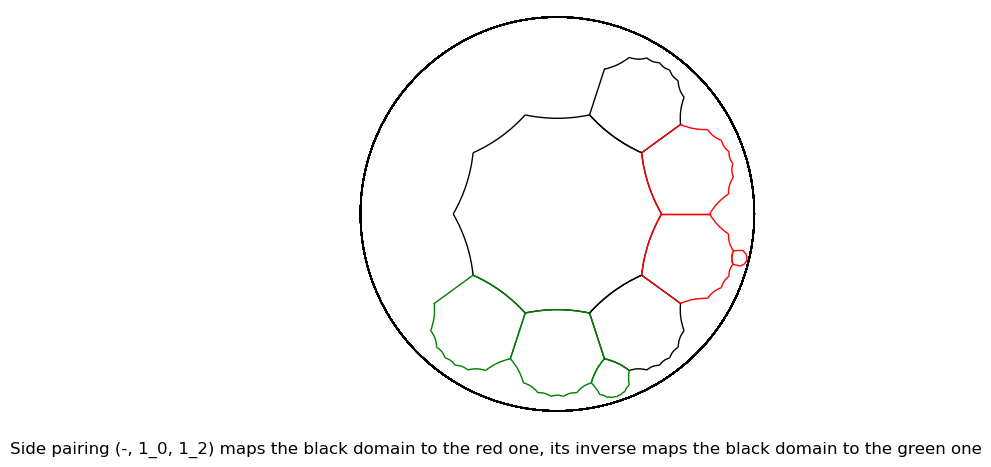

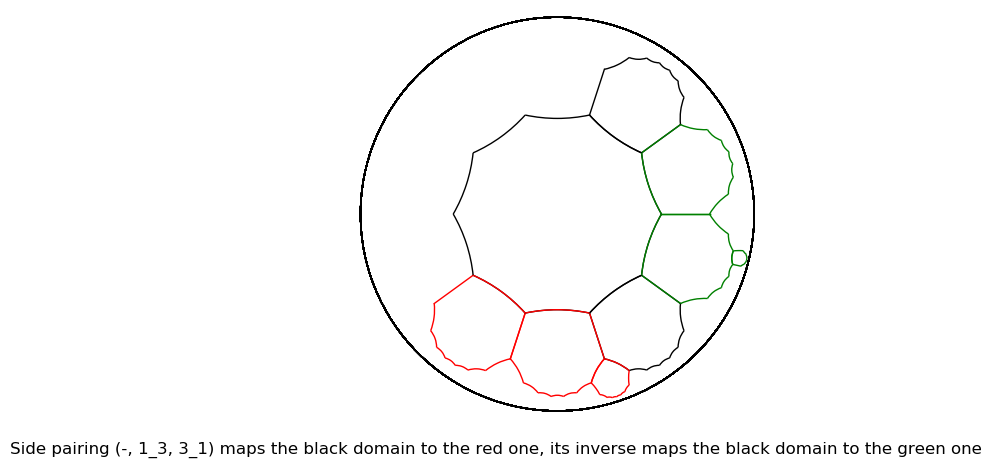

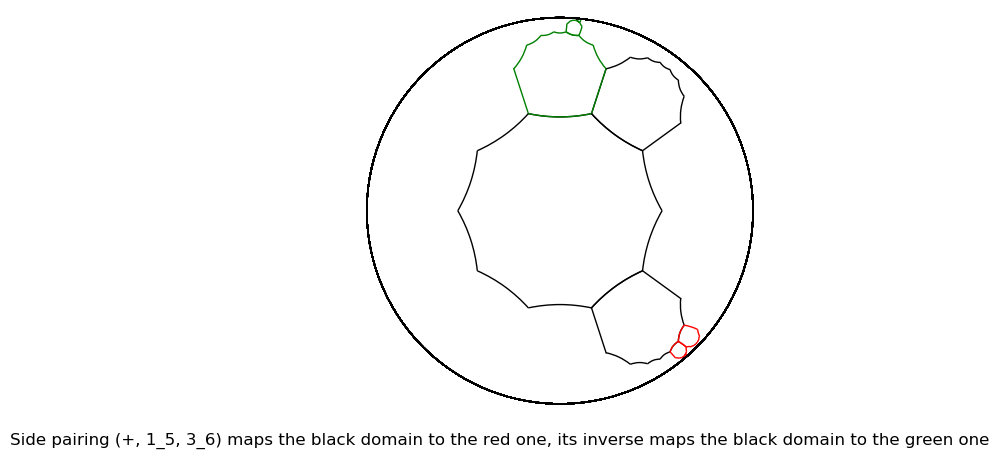

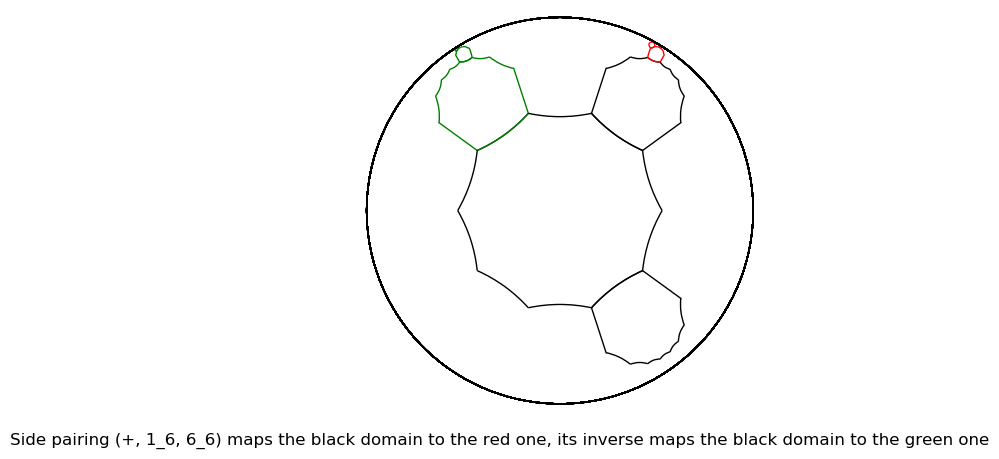

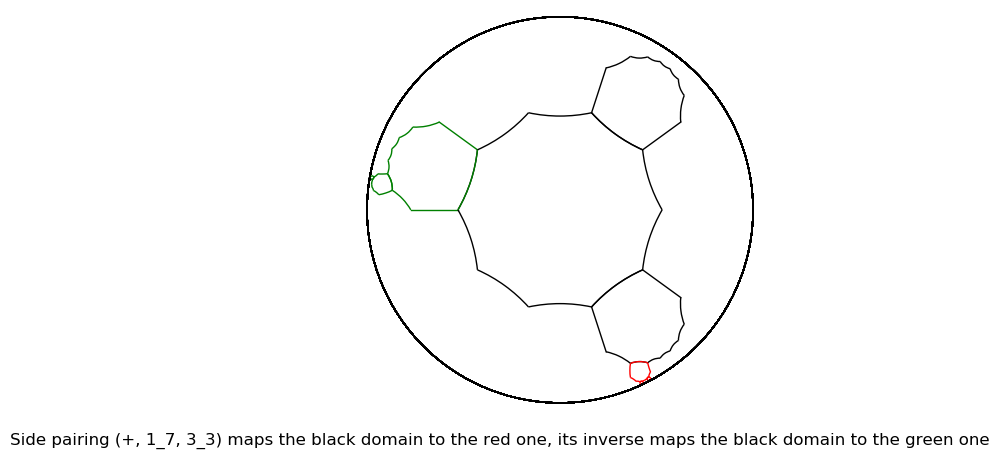

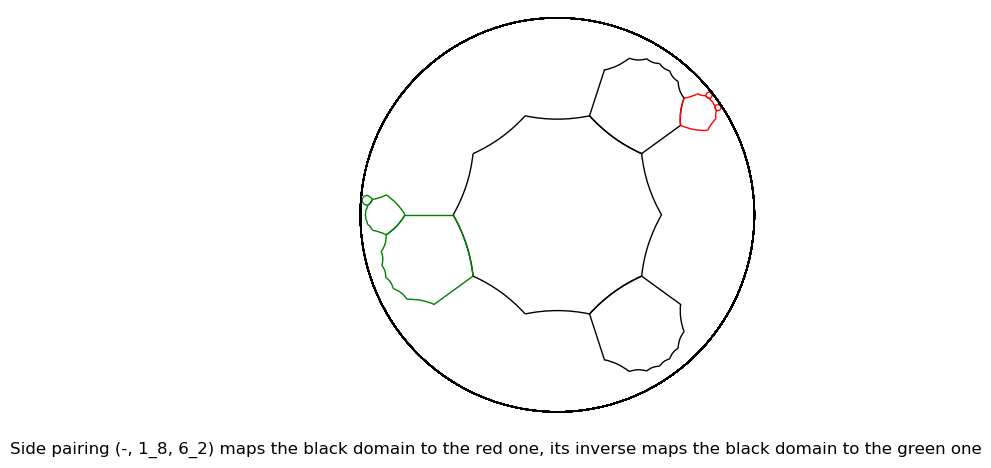

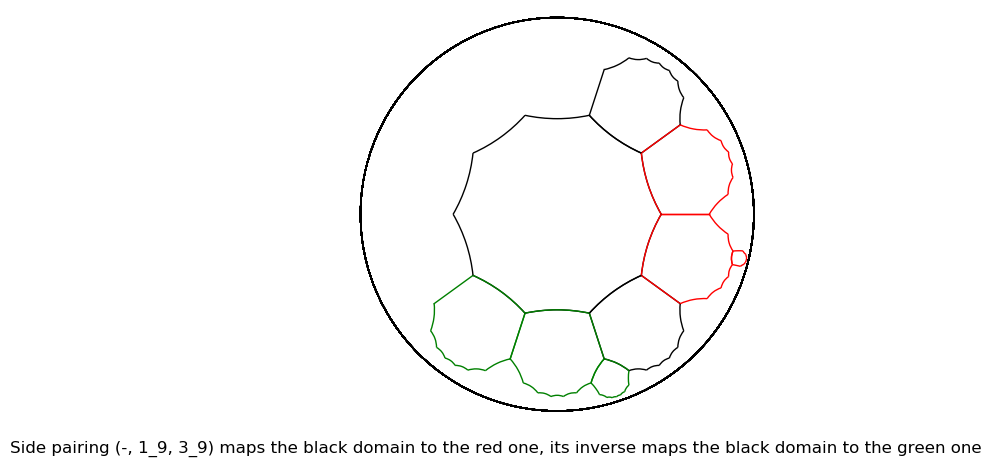

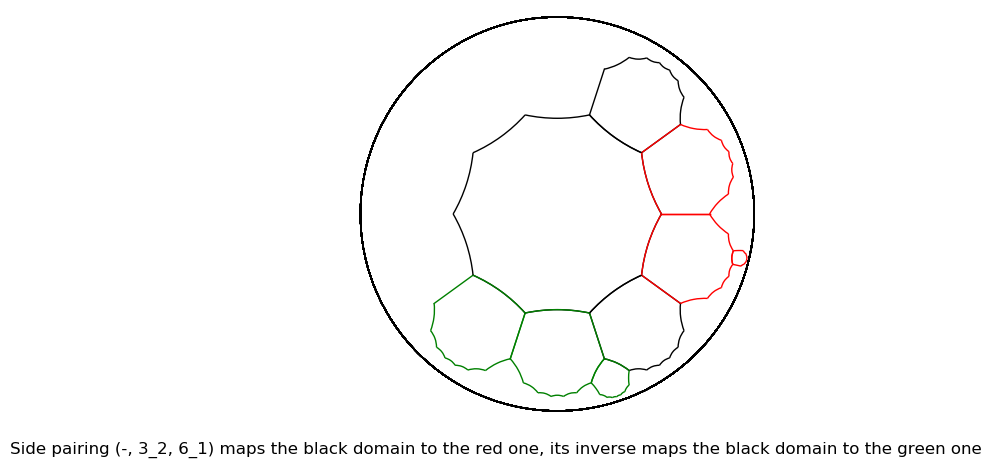

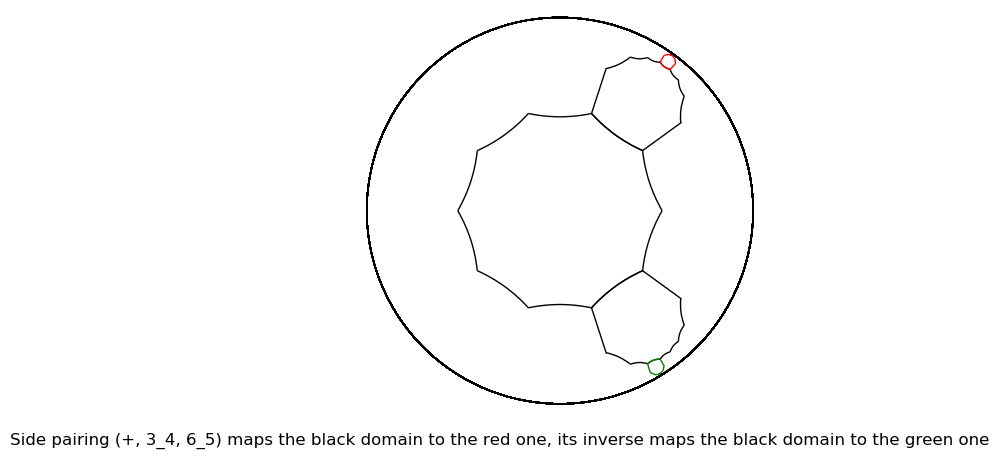

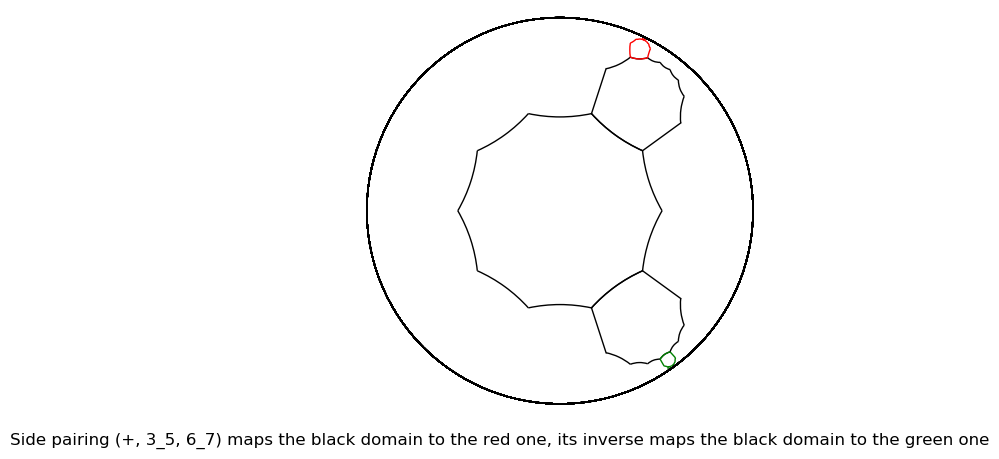

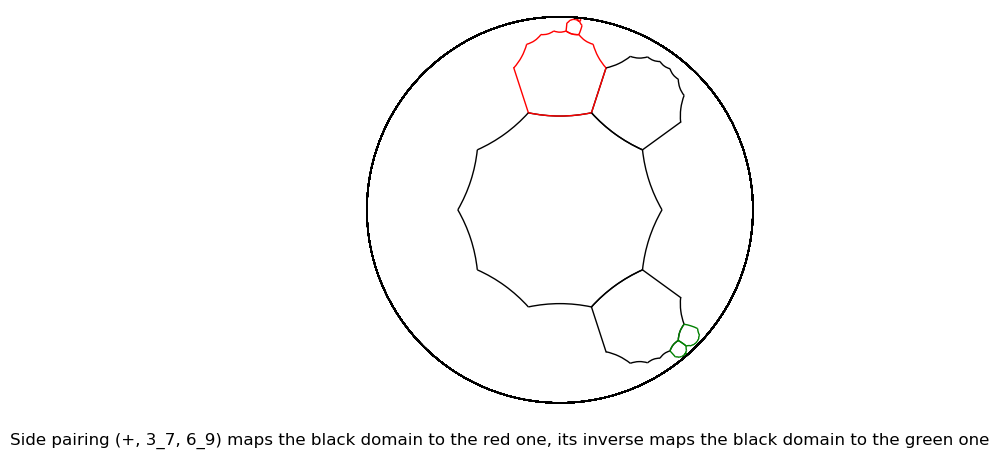

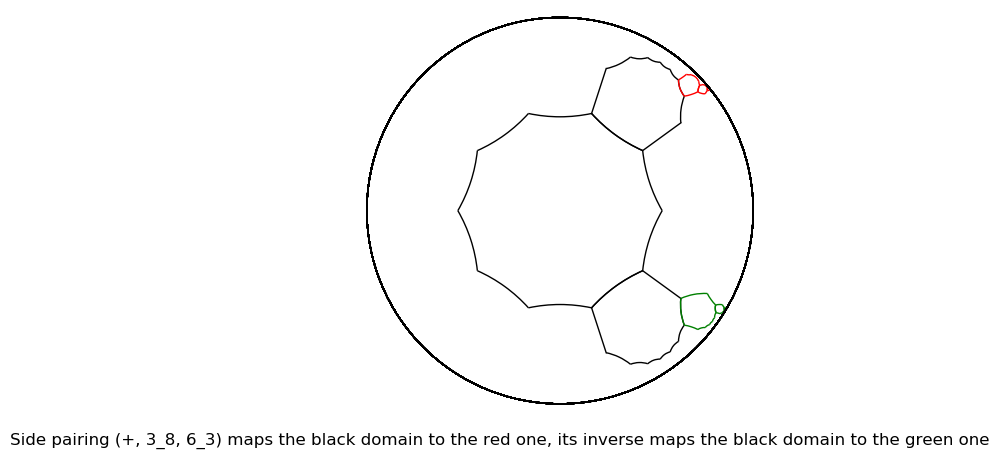

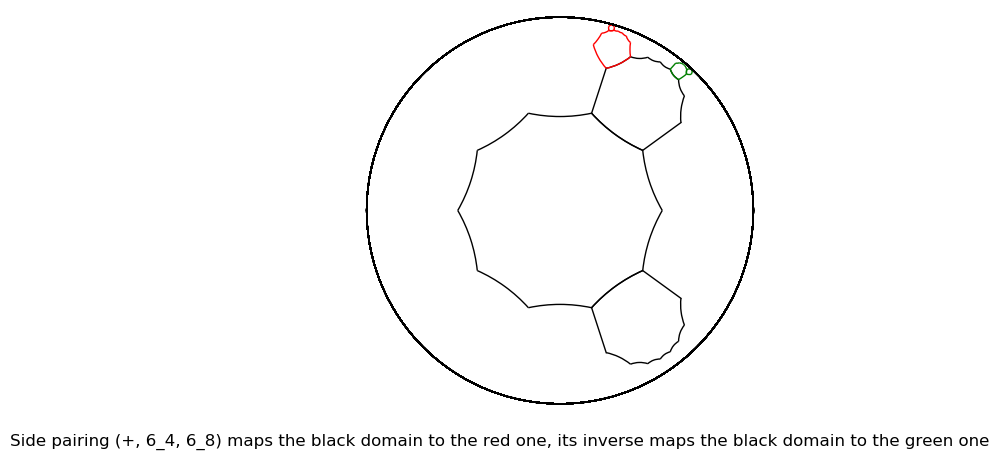

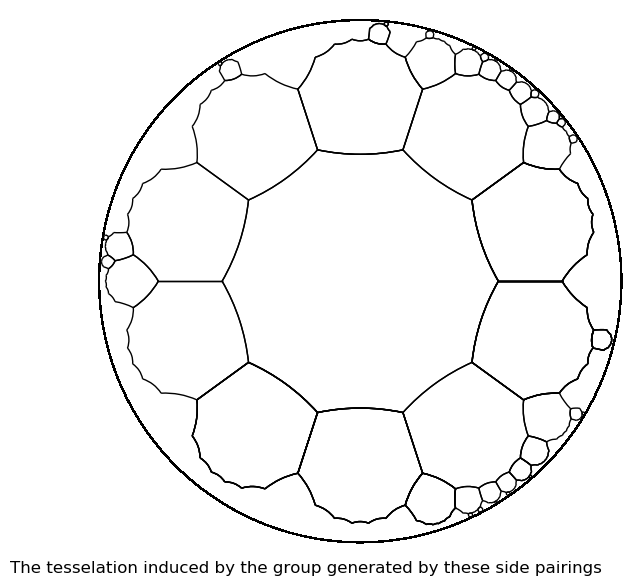

In [6]:
########## CELL 5: USE IT IF YOU WANT TO CHECK GRAPHICALLY HOW OUR SIDE PAIRINGS ACT. 
########## THE IMAGE OF plotdom (THE FUNDAMENTAL DOMAIN F) BY THE SIDE PAIRING IS DEPICTED IN RED. 
########## THE IMAGE BY THE INVERSE IS DEPICTED IN GREEN.
########## THE SIDE PAIRING MAPS THE GREEN EDGE(S) OF plotdom TO THE RED ONE(S). 
########## THE CONFORMALITY/ANTICONFORMALITY OF THE SIDE PAIRING IS DETERMINED BY THE PARITY OF ITS LENGTH AS A WORD IN a,b,c

total=plotdom;
for j in [1..len(sidepairings)-1]:

    pairing=sidepairings[j]
    resultado=plotdom+moverpol(pairing,'red')
    total=total+moverpol(pairing,'black')
    for k in [1,4]:
        resultado=resultado+moverpol(pairing*(c*a)^k*a*b*(c*a)^-k,'red')
        total=total+moverpol(pairing*(c*a)^k*a*b*(c*a)^-k,'black')

    pairing_inv=sidepairings[j]^(-1)
    resultado=resultado+moverpol(pairing_inv,'green')
    total=total+moverpol(pairing_inv,'black')
    for k in [1,4]:
        resultado=resultado+moverpol(pairing_inv*(c*a)^k*a*b*(c*a)^-k,'green')
        total=total+moverpol(pairing_inv*(c*a)^k*a*b*(c*a)^-k,'black')
    show(resultado, title='Side pairing '+sidepairingscode[j]+' maps the black domain to the red one, its inverse maps the black domain to the green one', title_pos=(0.35,-0.1))
    
show(total, title='The tesselation induced by the group generated by these side pairings', title_pos=(0.4,-0.05))

In [7]:
########## CELL 6: DEFINING AN ELLIPTIC ELEMENT tau OF ORDER TWO THAT NORMALIZES THE GROUP K
########## candidate IS A POSSIBLE CENTER OF ONE OF THE DISCS OF A HIDDEN EXTREMAL PACKING, OBTAINED BY THE BRUTE FORCE PROCEDURE
########## conjugates IS A LIST OF CERTAIN ELEMENTS OF THE GROUP K
########## WE SHOW HERE NUMERICALLY THAT conjugates[j]*tau*sidepairing[j]*tau^(-1) IS THE IDENTITY

candidate=0.285586204695390 + 0.393075688878707*I
tau=rotasionpi(((c*a)^1*b*B).coordinates(),candidate)

conjugates=['cero', 
sidepairings[1],
sidepairings[1]^-1,
sidepairings[3],
sidepairings[12]^-1*sidepairings[4]*sidepairings[5]^-1,
sidepairings[12]^-1,
sidepairings[1]*sidepairings[5]^-1,
sidepairings[1],
sidepairings[1],
sidepairings[4]*sidepairings[5]^-1,
sidepairings[4]*sidepairings[3]^-1,
sidepairings[3]^-1,
sidepairings[5]^-1,
sidepairings[1]^-1*sidepairings[6]*sidepairings[3]^-1]

for j in [1..len(conjugates)-1]:
    print(conjugates[j]*tau*sidepairings[j]*tau^-1)


Isometry in PD
[   -1.00000000000000 + 1.89848137210902e-14*I 1.44328993201270e-15 - 2.26485497023532e-14*I]
[1.44328993201270e-15 + 2.26485497023532e-14*I    -1.00000000000000 - 1.89848137210902e-14*I]
Isometry in PD
[     1.00000000000000 - 4.44089209850063e-16*I -6.21724893790088e-15 + 1.07691633388640e-14*I]
[-6.21724893790088e-15 - 1.07691633388640e-14*I      1.00000000000000 + 4.44089209850063e-16*I]
Isometry in PD
[     1.00000000000001 + 1.58983937126322e-13*I -1.21236354289067e-13 - 1.00919272938427e-13*I]
[-1.21236354289067e-13 + 1.00919272938427e-13*I      1.00000000000001 - 1.58983937126322e-13*I]
Isometry in PD
[   0.999999999999989 - 9.30922006148194e-14*I 4.72399896978004e-14 + 8.13238365537927e-14*I]
[4.72399896978004e-14 - 8.13238365537927e-14*I    0.999999999999989 + 9.30922006148194e-14*I]
Isometry in PD
[   0.999999999999998 - 1.00530694879808e-13*I 4.86832796298131e-14 + 9.04831765069503e-14*I]
[4.86832796298131e-14 - 9.04831765069503e-14*I    0.999999999999998 + 1

In [8]:
########## Cell 7: the fixed point of tau
tau.fixed_point_set()

[Point in PD 0.310308856551900 - 0.225452581101672*I]